In [34]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [35]:
import tensorflow as tf

In [36]:
tf.keras.utils.get_file('horse-or-human.zip','https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip')


'C:\\Users\\sahar\\.keras\\datasets\\horse-or-human.zip'

In [41]:
import os # operating system commands
import zipfile #to handle zip file

local_zip = 'C:\\Users\\sahar\\.keras\\datasets\\horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
zip_ref.close()


In [51]:
# Directory with our training horse pictures
import os
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

In [52]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [53]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

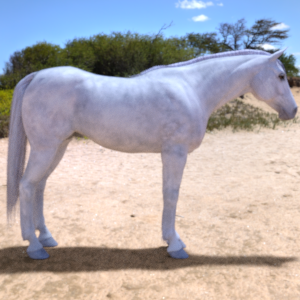

In [54]:
image_1 = load_img('horse-or-human/horses/horse01-7.png')
image_1

In [55]:
import matplotlib.image as mpimg
import numpy as np
imd = mpimg.imread('horse-or-human/horses/horse01-7.png')
imd.shape

(300, 300, 4)

In [56]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [57]:
folder_count = len(glob('horse-or-human/*'))
print(folder_count)

6


In [58]:
IMG_HIEGHT = 300
IMG_WIDHT = 300

In [59]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=25,
                                     zoom_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                    validation_split=0.2,)

In [60]:
train_data_gen = image_gen_train.flow_from_directory(directory='horse-or-human',
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training',
                                                    class_mode='binary')

Found 5276 images belonging to 6 classes.


In [61]:
train_data_gen.class_indices

{'cats_and_dogs_filtered': 0,
 'horse-or-human': 1,
 'horses': 2,
 'humans': 3,
 'train': 4,
 'validation': 5}

In [62]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
val_data_gen = image_gen_val.flow_from_directory(directory='horse-or-human',
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation',
                                                class_mode='binary')

Found 1317 images belonging to 6 classes.


In [63]:
import time

In [64]:
sample_data, label = next(train_data_gen)

In [65]:
sample_data.shape

(32, 300, 300, 3)

In [66]:
label

array([0., 4., 1., 1., 4., 3., 1., 1., 0., 0., 1., 1., 0., 0., 1., 4., 1.,
       1., 1., 4., 4., 0., 3., 1., 1., 0., 0., 0., 0., 1., 1., 3.],
      dtype=float32)

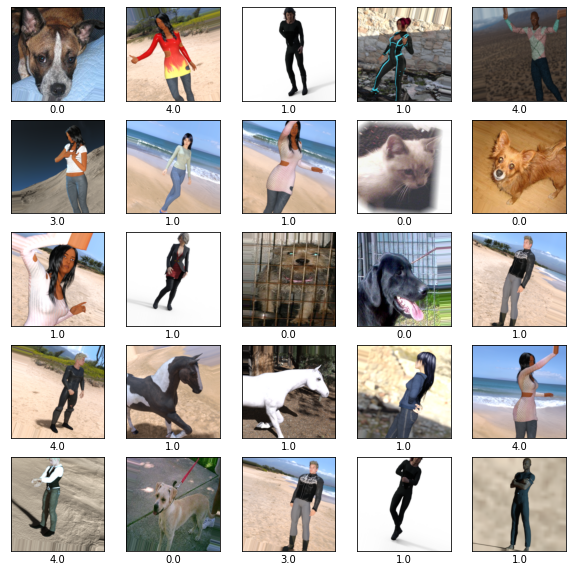

In [67]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_data[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

In [68]:
from keras import layers
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (300, 300, 3),include_top = False, weights = 'imagenet')

In [69]:
for layer in base_model.layers:
    layer.trainable = False

In [70]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

vgg_model = tf.keras.models.Model(base_model.input, x)

In [71]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [72]:
vgg_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

C:\Users\sahar\.conda\envs\deepl\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [73]:
tf.keras.utils.plot_model(vgg_model,show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [74]:
t1 = time.time()
history = vgg_model.fit_generator(train_data_gen, epochs=10, validation_data=val_data_gen)
t2 = time.time()

C:\Users\sahar\.conda\envs\deepl\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


ResourceExhaustedError:  OOM when allocating tensor with shape[32,64,300,300] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/block1_conv2/Relu (defined at <ipython-input-74-5c2b2933ef5a>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_6907]

Function call stack:
train_function


In [ ]:
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(300, 300 ,3), include_top=False, weights="imagenet")

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)
#x = layers.Dense(16, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

res_net_model = tf.keras.models.Model(base_model.input, x)


res_net_model.summary()

In [ ]:
res_net_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
t1 = time.time()
history = res_net_model.fit_generator(train_data_gen, epochs=2, validation_data=val_data_gen)
t2 = time.time()

In [ ]:
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')
train_score = res_net_model.evaluate_generator(train_data_gen)
valid_score = res_net_model.evaluate_generator(val_data_gen)
print("Train_Accuracy = ", train_score[1])
print("Validation_Accuracy = ", valid_score[1])

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

inception_model = tf.keras.models.Model(base_model.input, x)

In [ ]:
inception_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
t1 = time.time()
history = inception_model.fit_generator(train_data_gen, epochs=2, validation_data=val_data_gen)
t2 = time.time()
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')

In [ ]:
#Efficientnet#

In [ ]:
!pip install -U efficientnet

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

base_model = EfficientNetB0(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

efficientnet = tf.keras.models.Model(base_model.input, x)

In [ ]:
efficientnet.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
t1 = time.time()
history = efficientnet.fit_generator(train_data_gen, epochs=2, validation_data=val_data_gen)
t2 = time.time()